In [1]:
import os
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir('Resources/')

In [2]:
df = pd.read_csv('1_CC_Structured_Data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,Young,Male,Atypical Angina,Pre-high,High,No,Normal,High,No,No,Upsloping,No
1,Middle-aged,Female,Non-anginal Pain,High,Desirable,No,Normal,High,No,Mild,Flat,Yes
2,Young,Male,Atypical Angina,Normal,High,No,Abnormal ST-T Wave,Low,No,No,Upsloping,No
3,Middle-aged,Female,Asymptomatic,Pre-high,Borderline High,No,Normal,Moderate,Yes,Moderate,Flat,Yes
4,Senior,Male,Non-anginal Pain,Pre-high,Desirable,No,Normal,Moderate,No,No,Upsloping,No


In [3]:
# Rename columns for clarity (if necessary)
df.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol', 'FastingBloodSugar', 'RestingECG', 'MaximumHeartRate', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

# Convert 'HeartDisease' to numerical values
df['HeartDisease'] = df['HeartDisease'].map({'No': 0, 'Yes': 1})

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your DataFrame with the necessary data
sns.set(style="whitegrid")

# List of attributes to plot
attributes = ['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol', 'FastingBloodSugar', 
              'RestingECG', 'MaximumHeartRate', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

# Iterate through the attributes and create histograms
for i, attribute in enumerate(attributes):
    plt.figure(figsize=(8, 6))
    plot = sns.histplot(data=df, x=attribute, hue='HeartDisease', multiple='stack', 
                        palette={0: "blue", 1: "orange"}, kde=True)
    
    # Remove the legend
    if plot.legend_:
        plot.legend_.remove()
    
    plt.xlabel(attribute, fontsize=24, fontweight='bold', family='Arial')
    plt.ylabel('Frequency', fontsize=24, fontweight='bold', family='Arial')
    plt.tick_params(axis='x', rotation=-25, labelsize=24)
    plt.tick_params(axis='y', labelsize=24)

    plt.tight_layout()
    plt.savefig(f'Images/2_CC_{i+1}_{attribute}.jpeg', transparent=True)
    plt.close()


In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define custom legend elements
legend_elements = [
    Patch(facecolor='blue', label='No'),
    Patch(facecolor='orange', label='Yes')
]

# Create a blank figure just for the legend
plt.figure(figsize=(4, 2))
plt.legend(handles=legend_elements, title='Heart Disease', loc='center', frameon=False, fontsize=20, title_fontsize=20)
plt.axis('off')  # Hide axes
plt.tight_layout()

# Save the legend image
plt.savefig('Images/2_CC_legend_only.jpeg', transparent=True)
plt.close()


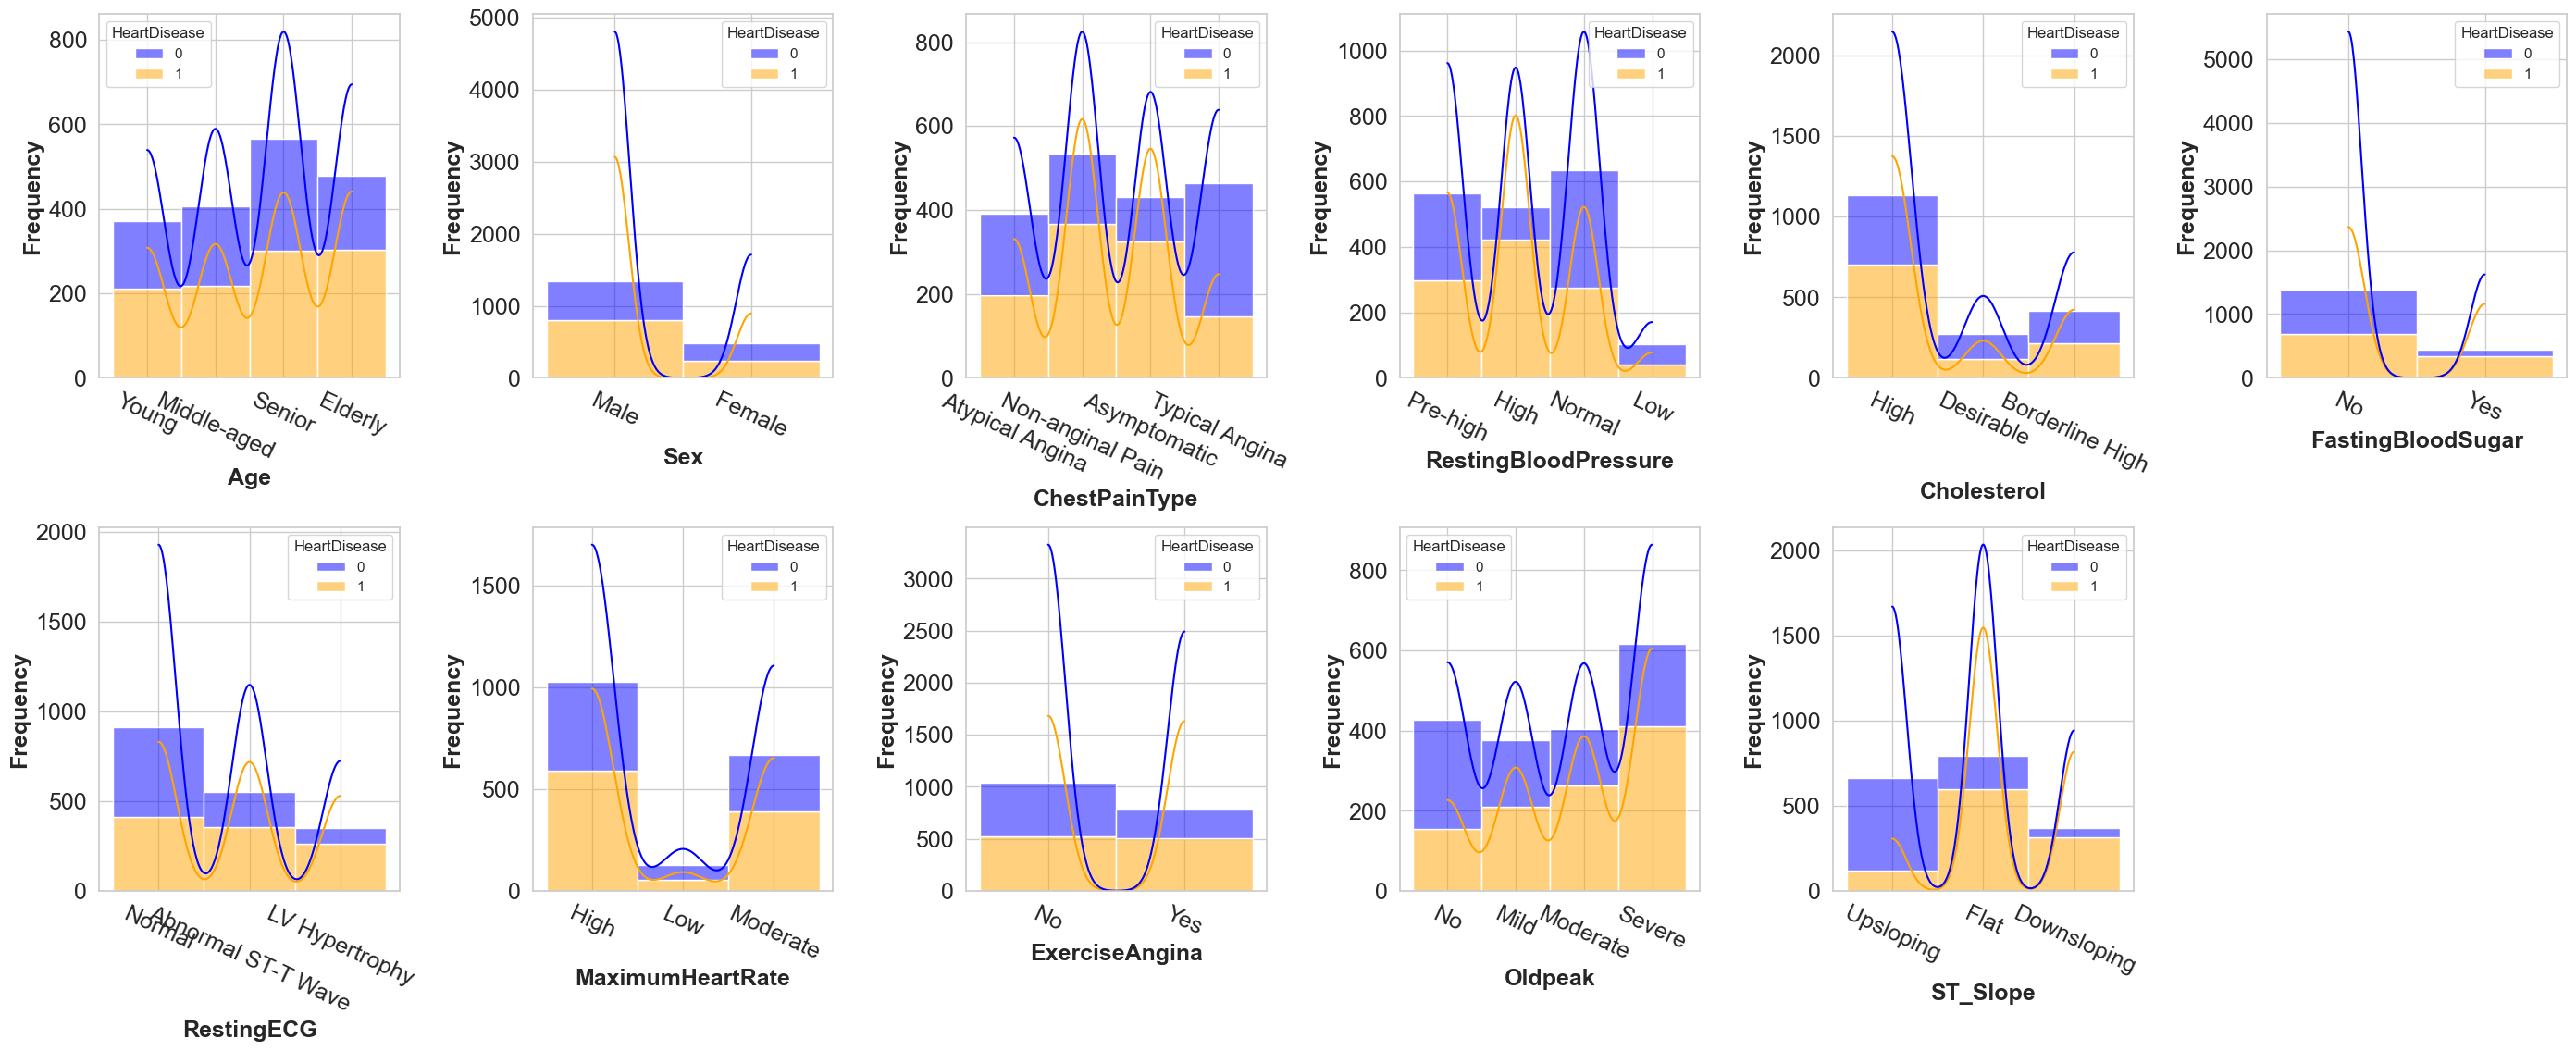

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your DataFrame with the necessary data
# Set up the plotting area
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(28, 12))

# List of attributes to plot
attributes = ['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol', 
              'FastingBloodSugar', 'RestingECG', 'MaximumHeartRate', 'ExerciseAngina', 
              'Oldpeak', 'ST_Slope']

# Iterate through the attributes and create histograms
for i, attribute in enumerate(attributes):
    row = i // 6
    col = i % 6
    ax = axes[row, col]
    sns.histplot(data=df, x=attribute, hue='HeartDisease', multiple='stack', ax=ax, 
                 palette={0: "blue", 1: "orange"}, kde=True)
    ax.set_xlabel(attribute, fontsize=18, fontweight='bold', family='Arial')
    ax.set_ylabel('Frequency', fontsize=18, fontweight='bold', family='Arial')
    ax.tick_params(axis='x', rotation=-25, labelsize=18)
    ax.tick_params(axis='y', labelsize=18)

# Remove the last empty subplot (if there's any)
if len(attributes) < 12:
    fig.delaxes(axes[1, 5])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('Images/2_CC_classification_graphs_.png', transparent=True)
plt.show()


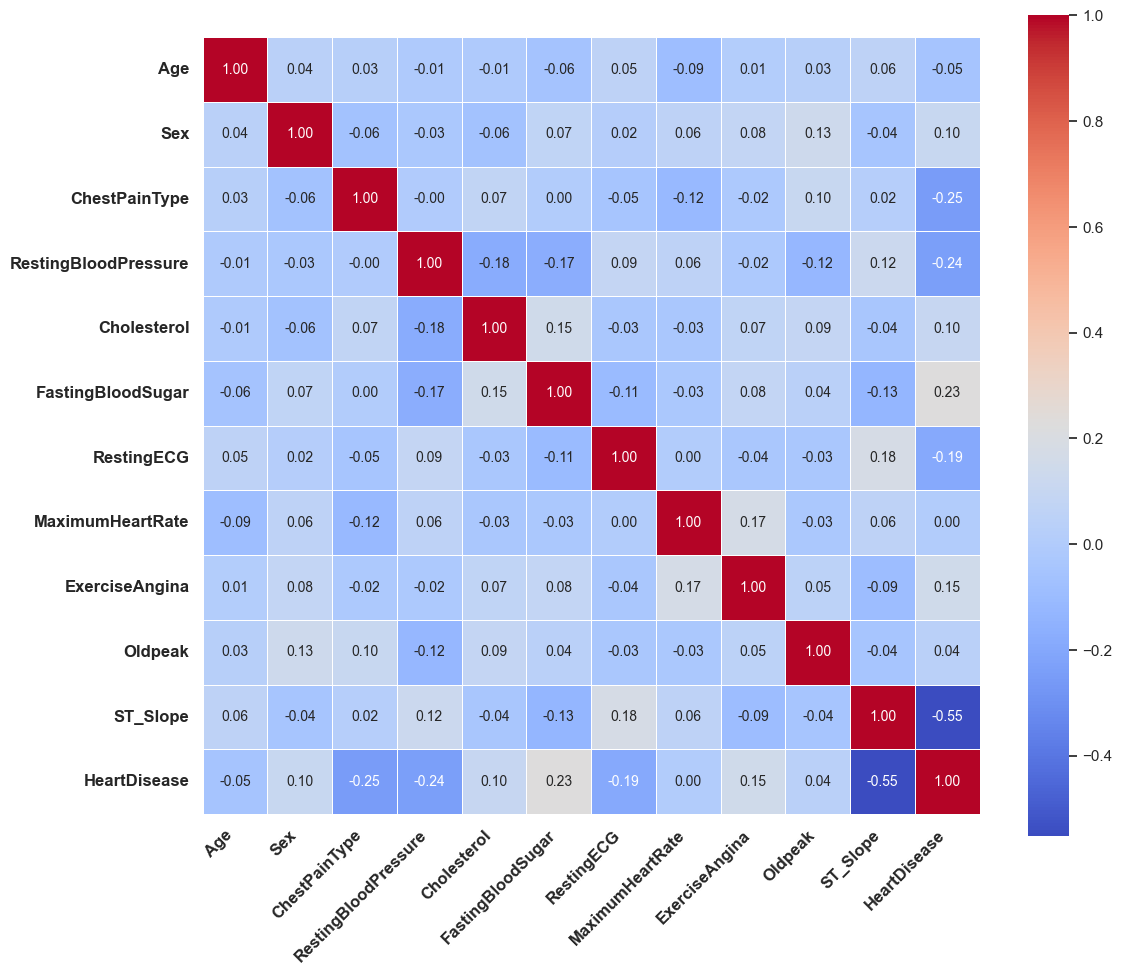

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert non-numeric columns into numeric using encoding
df_encoded = df.copy()

# Example: Encode 'Sex' and other categorical columns
categorical_columns = df_encoded.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    df_encoded[column] = df_encoded[column].astype('category').cat.codes

# Step 2: Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Step 3: Create the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,            # Display correlation coefficients
    fmt=".2f",             # Format for the annotations
    cmap="coolwarm",       # Color map for heatmap
    cbar=True,             # Show color bar
    square=True,           # Make each cell square-shaped
    linewidths=0.5,        # Width of the lines between cells
    annot_kws={"size": 10, "family": "Arial"} # Font size and style for annotations
)

# Step 4: Add labels and title
plt.xticks(fontsize=12, rotation=45, ha='right', fontweight='bold', family='Arial')
plt.yticks(fontsize=12, rotation=0, fontweight='bold', family='Arial')

# Step 5: Adjust layout to avoid clipping
plt.tight_layout()

# Step 6: Save the heatmap as an image
plt.savefig('Images/2_Correlation_Matrix_Heatmap.jpeg', transparent=True)

# Show the plot
plt.show()